# Webscraping usando a Biblioteca BeautifulSoup 

## Extraindo preço dos imóveis á venda na cidade de Diadema-Sp


Extraindo dados do Site Viva Real e salvando em um Arquivo excel


In [219]:
#Bibliotecas 

import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re


In [220]:

url = 'https://www.vivareal.com.br/venda/sp/diadema/#onde=,S%C3%A3o%20Paulo,Diadema,,,,,city,BR%3ESao%20Paulo%3ENULL%3EDiadema,,,'

response = requests.get(url)



if response.status_code == 200:
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # Encontrando a composição do anúncio
    
    anuncio_imovel = soup.find_all('div', class_='js-card-selector')
    
    # Criando uma lista para obter dados dos anúncios de imóveis
    dados_imoveis = []
    
    for anuncio in anuncio_imovel:
        tipo_imovel = anuncio.find('h2').text
        preco_imovel = anuncio.find('div', class_="property-card__price js-property-card-prices js-property-card__price-small").text
        endereco_imovel = anuncio.find('span', class_="property-card__address").text
        
        
        #Criando dicionario com os dados do anuncio 
        dados_imovel = {
            'tipo_imovel': tipo_imovel,
            'preco_imovel': preco_imovel,
            'endereco_imovel': endereco_imovel
        }
        dados_imoveis.append(dados_imovel)
        
        # converter o dicionario em um Dataframe pandas
        df = pd.DataFrame(dados_imoveis)
        
        #imprimindo o DataFrame
        print(df)
        
        # Salvando o Dataframe em arquivo excel
        df.to_excel('anuncio_de_imovel_diadema.xlsx', index=False)
else:
    print('Erro ao acessar a página:',response.status_code)
    

                                         tipo_imovel            preco_imovel  \
0     Casa com 3 Quartos à Venda, 145m²    Rua Tu...        R$ 315.000         

                               endereco_imovel  
0  Rua Tupinambás, 1 - Conceição, Diadema - SP  
                                         tipo_imovel            preco_imovel  \
0     Casa com 3 Quartos à Venda, 145m²    Rua Tu...        R$ 315.000         
1     Condomínio Praça Moça    Rua Manoel da Nóbr...        R$ 700.000         

                                     endereco_imovel  
0        Rua Tupinambás, 1 - Conceição, Diadema - SP  
1  Rua Manoel da Nóbrega, 435 - Centro, Diadema - SP  
                                         tipo_imovel  \
0     Casa com 3 Quartos à Venda, 145m²    Rua Tu...   
1     Condomínio Praça Moça    Rua Manoel da Nóbr...   
2     Casa com 3 Quartos à Venda, 122m²    Rodovi...   

                                       preco_imovel  \
0                                  R$ 315.000         


                                          tipo_imovel  \
0      Casa com 3 Quartos à Venda, 145m²    Rua Tu...   
1      Condomínio Praça Moça    Rua Manoel da Nóbr...   
2      Casa com 3 Quartos à Venda, 122m²    Rodovi...   
3      Casa com 3 Quartos à Venda, 399m²    Rua Ja...   
4      Apartamento com 3 Quartos à Venda, 62m²    ...   
5      Apartamento com 2 Quartos à Venda, 80m²    ...   
6      Casa com 3 Quartos à Venda, 190m²    Rua Ra...   
7      Casa com 3 Quartos à Venda, 235m²    Rua Ca...   
8      Vivavita Diadema    Rua Manoel da Nóbrega, ...   
9      Casa com 2 Quartos à Venda, 138m²    Rua Na...   
10     Apartamento com 2 Quartos à Venda, 43m²    ...   

                                        preco_imovel  \
0                                   R$ 315.000         
1                                   R$ 700.000         
2         R$ 280.000      Preço abaixo do mercado      
3                                   R$ 479.810         
4                                  

                                          tipo_imovel  \
0      Casa com 3 Quartos à Venda, 145m²    Rua Tu...   
1      Condomínio Praça Moça    Rua Manoel da Nóbr...   
2      Casa com 3 Quartos à Venda, 122m²    Rodovi...   
3      Casa com 3 Quartos à Venda, 399m²    Rua Ja...   
4      Apartamento com 3 Quartos à Venda, 62m²    ...   
5      Apartamento com 2 Quartos à Venda, 80m²    ...   
6      Casa com 3 Quartos à Venda, 190m²    Rua Ra...   
7      Casa com 3 Quartos à Venda, 235m²    Rua Ca...   
8      Vivavita Diadema    Rua Manoel da Nóbrega, ...   
9      Casa com 2 Quartos à Venda, 138m²    Rua Na...   
10     Apartamento com 2 Quartos à Venda, 43m²    ...   
11     Apartamento com 2 Quartos à Venda, 44m²    ...   
12     Casa com 4 Quartos à Venda, 227m²    Rua Ca...   
13     Casa com 3 Quartos à Venda, 154m²    Rua Lu...   
14     Casa com 2 Quartos à Venda, 194m²    Rua Cl...   
15     D+ Diadema    Avenida Dom Pedro I, 1231 - C...   
16     Apartamento com 2 Quarto

                                          tipo_imovel  \
0      Casa com 3 Quartos à Venda, 145m²    Rua Tu...   
1      Condomínio Praça Moça    Rua Manoel da Nóbr...   
2      Casa com 3 Quartos à Venda, 122m²    Rodovi...   
3      Casa com 3 Quartos à Venda, 399m²    Rua Ja...   
4      Apartamento com 3 Quartos à Venda, 62m²    ...   
5      Apartamento com 2 Quartos à Venda, 80m²    ...   
6      Casa com 3 Quartos à Venda, 190m²    Rua Ra...   
7      Casa com 3 Quartos à Venda, 235m²    Rua Ca...   
8      Vivavita Diadema    Rua Manoel da Nóbrega, ...   
9      Casa com 2 Quartos à Venda, 138m²    Rua Na...   
10     Apartamento com 2 Quartos à Venda, 43m²    ...   
11     Apartamento com 2 Quartos à Venda, 44m²    ...   
12     Casa com 4 Quartos à Venda, 227m²    Rua Ca...   
13     Casa com 3 Quartos à Venda, 154m²    Rua Lu...   
14     Casa com 2 Quartos à Venda, 194m²    Rua Cl...   
15     D+ Diadema    Avenida Dom Pedro I, 1231 - C...   
16     Apartamento com 2 Quarto

                                          tipo_imovel  \
0      Casa com 3 Quartos à Venda, 145m²    Rua Tu...   
1      Condomínio Praça Moça    Rua Manoel da Nóbr...   
2      Casa com 3 Quartos à Venda, 122m²    Rodovi...   
3      Casa com 3 Quartos à Venda, 399m²    Rua Ja...   
4      Apartamento com 3 Quartos à Venda, 62m²    ...   
5      Apartamento com 2 Quartos à Venda, 80m²    ...   
6      Casa com 3 Quartos à Venda, 190m²    Rua Ra...   
7      Casa com 3 Quartos à Venda, 235m²    Rua Ca...   
8      Vivavita Diadema    Rua Manoel da Nóbrega, ...   
9      Casa com 2 Quartos à Venda, 138m²    Rua Na...   
10     Apartamento com 2 Quartos à Venda, 43m²    ...   
11     Apartamento com 2 Quartos à Venda, 44m²    ...   
12     Casa com 4 Quartos à Venda, 227m²    Rua Ca...   
13     Casa com 3 Quartos à Venda, 154m²    Rua Lu...   
14     Casa com 2 Quartos à Venda, 194m²    Rua Cl...   
15     D+ Diadema    Avenida Dom Pedro I, 1231 - C...   
16     Apartamento com 2 Quarto

                                          tipo_imovel  \
0      Casa com 3 Quartos à Venda, 145m²    Rua Tu...   
1      Condomínio Praça Moça    Rua Manoel da Nóbr...   
2      Casa com 3 Quartos à Venda, 122m²    Rodovi...   
3      Casa com 3 Quartos à Venda, 399m²    Rua Ja...   
4      Apartamento com 3 Quartos à Venda, 62m²    ...   
5      Apartamento com 2 Quartos à Venda, 80m²    ...   
6      Casa com 3 Quartos à Venda, 190m²    Rua Ra...   
7      Casa com 3 Quartos à Venda, 235m²    Rua Ca...   
8      Vivavita Diadema    Rua Manoel da Nóbrega, ...   
9      Casa com 2 Quartos à Venda, 138m²    Rua Na...   
10     Apartamento com 2 Quartos à Venda, 43m²    ...   
11     Apartamento com 2 Quartos à Venda, 44m²    ...   
12     Casa com 4 Quartos à Venda, 227m²    Rua Ca...   
13     Casa com 3 Quartos à Venda, 154m²    Rua Lu...   
14     Casa com 2 Quartos à Venda, 194m²    Rua Cl...   
15     D+ Diadema    Avenida Dom Pedro I, 1231 - C...   
16     Apartamento com 2 Quarto

In [221]:
# Lendo o DataFrame
df = pd.read_excel('anuncio_de_imovel_diadem.xlsx')
df.head()

,tipo_imovel,preco_imovel,endereco_imovel
0,"Apartamento com 2 Quartos à Venda, 44m² ...",R$ 235.000,"Avenida Fábio Eduardo Ramos Esquivel, 2900 - C..."
1,Moema Signature - Residencial Rua Gaivot...,Sob Consulta,"Rua Gaivota, 501 - Campanário, Diadema - SP"
2,"Apartamento com 2 Quartos à Venda, 56m² ...",R$ 370.000,"Conceição, Diadema - SP"
3,"Apartamento com 3 Quartos à Venda, 62m² ...",R$ 390.000,"Rua Gaspar Ricardo, 309 - Centro, Diadema - SP"
4,"Apartamento com 2 Quartos à Venda, 48m² ...",R$ 298.000,"Rua Coimbra, 215 - Centro, Diadema - SP"


In [222]:
# Adicionando as colunas desejadas ao DataFrame
df['Tipo de Imovel'] = df['tipo_imovel'].str.extract(r'([^,]+)')
df['Qtd Quartos'] = df['tipo_imovel'].str.extract(r'(\d+)(?: Quarto|\sQuartos)')
df['Qtd Quartos'] = df['Qtd Quartos'].fillna('1').astype(int).apply(lambda x: f"{x} Quarto")


In [223]:
df.head()

,tipo_imovel,preco_imovel,endereco_imovel,Tipo de Imovel,Qtd Quartos
0,"Apartamento com 2 Quartos à Venda, 44m² ...",R$ 235.000,"Avenida Fábio Eduardo Ramos Esquivel, 2900 - C...",Apartamento com 2 Quartos à Venda,2 Quarto
1,Moema Signature - Residencial Rua Gaivot...,Sob Consulta,"Rua Gaivota, 501 - Campanário, Diadema - SP",Moema Signature - Residencial Rua Gaivota,1 Quarto
2,"Apartamento com 2 Quartos à Venda, 56m² ...",R$ 370.000,"Conceição, Diadema - SP",Apartamento com 2 Quartos à Venda,2 Quarto
3,"Apartamento com 3 Quartos à Venda, 62m² ...",R$ 390.000,"Rua Gaspar Ricardo, 309 - Centro, Diadema - SP",Apartamento com 3 Quartos à Venda,3 Quarto
4,"Apartamento com 2 Quartos à Venda, 48m² ...",R$ 298.000,"Rua Coimbra, 215 - Centro, Diadema - SP",Apartamento com 2 Quartos à Venda,2 Quarto


In [224]:
# Adicionando a nova coluna 'Tipo Extraído'
df['tipo_imovel'] = df['Tipo de Imovel'].str.extract(r'(Apartamento|Sala|Casa)')



In [225]:
df.head()

,tipo_imovel,preco_imovel,endereco_imovel,Tipo de Imovel,Qtd Quartos
0,Apartamento,R$ 235.000,"Avenida Fábio Eduardo Ramos Esquivel, 2900 - C...",Apartamento com 2 Quartos à Venda,2 Quarto
1,NaN,Sob Consulta,"Rua Gaivota, 501 - Campanário, Diadema - SP",Moema Signature - Residencial Rua Gaivota,1 Quarto
2,Apartamento,R$ 370.000,"Conceição, Diadema - SP",Apartamento com 2 Quartos à Venda,2 Quarto
3,Apartamento,R$ 390.000,"Rua Gaspar Ricardo, 309 - Centro, Diadema - SP",Apartamento com 3 Quartos à Venda,3 Quarto
4,Apartamento,R$ 298.000,"Rua Coimbra, 215 - Centro, Diadema - SP",Apartamento com 2 Quartos à Venda,2 Quarto


In [226]:
# Usando expressão regular para extrair o número de quartos
df['Numero de Quartos'] = df['Qtd Quartos'].apply(lambda x: int(re.search(r'\d+', x).group()) if re.search(r'\d+', x) else None)

In [227]:
df.head()

,tipo_imovel,preco_imovel,endereco_imovel,Tipo de Imovel,Qtd Quartos,Numero de Quartos
0,Apartamento,R$ 235.000,"Avenida Fábio Eduardo Ramos Esquivel, 2900 - C...",Apartamento com 2 Quartos à Venda,2 Quarto,2
1,NaN,Sob Consulta,"Rua Gaivota, 501 - Campanário, Diadema - SP",Moema Signature - Residencial Rua Gaivota,1 Quarto,1
2,Apartamento,R$ 370.000,"Conceição, Diadema - SP",Apartamento com 2 Quartos à Venda,2 Quarto,2
3,Apartamento,R$ 390.000,"Rua Gaspar Ricardo, 309 - Centro, Diadema - SP",Apartamento com 3 Quartos à Venda,3 Quarto,3
4,Apartamento,R$ 298.000,"Rua Coimbra, 215 - Centro, Diadema - SP",Apartamento com 2 Quartos à Venda,2 Quarto,2


In [228]:
# Função para extrair o preço dos imóveis
def extrair_numero_completo_string(df):
    resultado = re.search(r'R\$\s*([\d.,]+)', df)
    if resultado:
        numero_formatado = resultado.group(1)
        return numero_formatado.replace(',', '')
    else:
        return None

In [229]:
# Extraindo o preço dos imóveis
df['prec_nmr'] = df['preco_imovel'].apply(extrair_numero_completo_string)

In [230]:
df.head()

,tipo_imovel,preco_imovel,endereco_imovel,Tipo de Imovel,Qtd Quartos,Numero de Quartos,prec_nmr
0,Apartamento,R$ 235.000,"Avenida Fábio Eduardo Ramos Esquivel, 2900 - C...",Apartamento com 2 Quartos à Venda,2 Quarto,2,235.000
1,NaN,Sob Consulta,"Rua Gaivota, 501 - Campanário, Diadema - SP",Moema Signature - Residencial Rua Gaivota,1 Quarto,1,None
2,Apartamento,R$ 370.000,"Conceição, Diadema - SP",Apartamento com 2 Quartos à Venda,2 Quarto,2,370.000
3,Apartamento,R$ 390.000,"Rua Gaspar Ricardo, 309 - Centro, Diadema - SP",Apartamento com 3 Quartos à Venda,3 Quarto,3,390.000
4,Apartamento,R$ 298.000,"Rua Coimbra, 215 - Centro, Diadema - SP",Apartamento com 2 Quartos à Venda,2 Quarto,2,298.000


In [231]:

df.columns

Index(['tipo_imovel', 'preco_imovel', 'endereco_imovel', 'Tipo de Imovel',
       'Qtd Quartos', 'Numero de Quartos', 'prec_nmr'],
      dtype='object')

In [232]:
df.drop(['preco_imovel','Tipo de Imovel', 'Qtd Quartos'], axis=1, inplace=True)

In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   tipo_imovel        33 non-null     object
 1   endereco_imovel    36 non-null     object
 2   Numero de Quartos  36 non-null     int64 
 3   prec_nmr           35 non-null     object
dtypes: int64(1), object(3)
memory usage: 1.3+ KB


In [234]:
# Convertendo a coluna 'prec_nmr' para float usando pd.to_numeric()
df['prec_nmr'] = pd.to_numeric(df['prec_nmr'], errors='coerce')

In [235]:
df.head()

,tipo_imovel,endereco_imovel,Numero de Quartos,prec_nmr
0,Apartamento,"Avenida Fábio Eduardo Ramos Esquivel, 2900 - C...",2,235.0
1,NaN,"Rua Gaivota, 501 - Campanário, Diadema - SP",1,NaN
2,Apartamento,"Conceição, Diadema - SP",2,370.0
3,Apartamento,"Rua Gaspar Ricardo, 309 - Centro, Diadema - SP",3,390.0
4,Apartamento,"Rua Coimbra, 215 - Centro, Diadema - SP",2,298.0


In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tipo_imovel        33 non-null     object 
 1   endereco_imovel    36 non-null     object 
 2   Numero de Quartos  36 non-null     int64  
 3   prec_nmr           35 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.3+ KB


Valores N/A da coluna tipo_imovel estava com alguns resultados como Condominio ao criar coluna, todos foram substituidos por Apartamento.
Valores N/A na coluna preco_nmr foram substituidos pela média


In [237]:
# Substituindo valores Faltantes 
df['tipo_imovel'] = df['tipo_imovel'].fillna('Apartamento') 
df['prec_nmr'] = df['prec_nmr'].fillna(df['prec_nmr'].mean())

In [238]:
df.head()

,tipo_imovel,endereco_imovel,Numero de Quartos,prec_nmr
0,Apartamento,"Avenida Fábio Eduardo Ramos Esquivel, 2900 - C...",2,235.000000
1,Apartamento,"Rua Gaivota, 501 - Campanário, Diadema - SP",1,360.589657
2,Apartamento,"Conceição, Diadema - SP",2,370.000000
3,Apartamento,"Rua Gaspar Ricardo, 309 - Centro, Diadema - SP",3,390.000000
4,Apartamento,"Rua Coimbra, 215 - Centro, Diadema - SP",2,298.000000


In [239]:
# Estatísticas Descritivas
df.describe()

,Numero de Quartos,prec_nmr
count,36.000000,36.000000
mean,2.027778,360.589657
std,0.506309,122.356803
min,1.000000,235.000000
25%,2.000000,266.882500
50%,2.000000,342.500000
75%,2.000000,391.250000
max,3.000000,714.900000


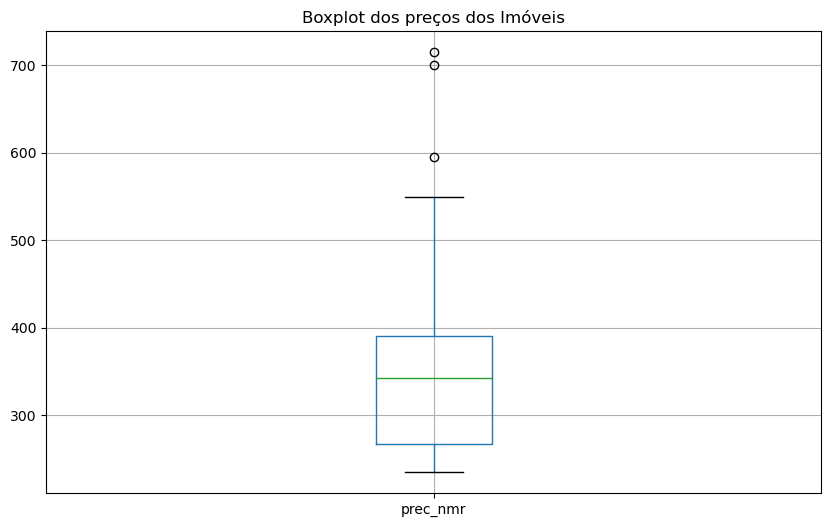

In [243]:
# Criando boxplot dos preços dos imóveis
plt.figure(figsize=(10, 6))
df.boxplot('prec_nmr')
plt.title('Boxplot dos preços dos Imóveis')
plt.show()

<Figure size 1000x600 with 0 Axes>

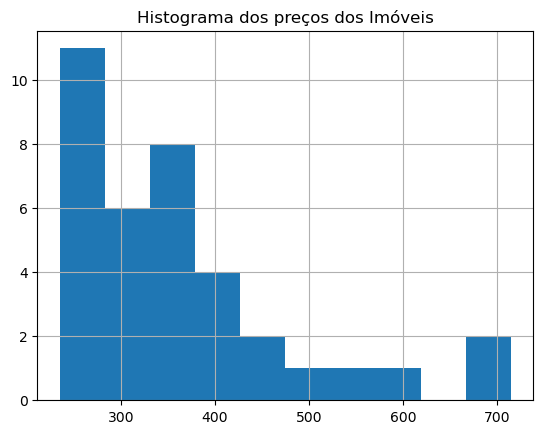

In [244]:
# Criando Histograma dos preços dos imóveis
plt.figure(figsize=(10, 6))
df.hist('prec_nmr')
plt.title('Histograma dos preços dos Imóveis')
plt.show()